In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Data counts (image counts)

In [2]:
# read in the csv
import pandas as pd
import numpy as np

df = pd.read_csv('/bask/homes/f/fspo1218/amber/data/gbif_macro_data/gbif_macro/datacount.csv')
df.head()

,taxon_key_gbif_id,search_species_name,gbif_species_name,count
0,5101394,Cossus cossus,Cossus cossus,500
1,1731598,Phragmataecia castaneae,Phragmataecia castaneae,500
2,1730978,Zeuzera pyrina,Zeuzera pyrina,500
3,1952229,Achlya flavicornis,Achlya flavicornis,500
4,1951557,Cilix glaucata,Cilix glaucata,500


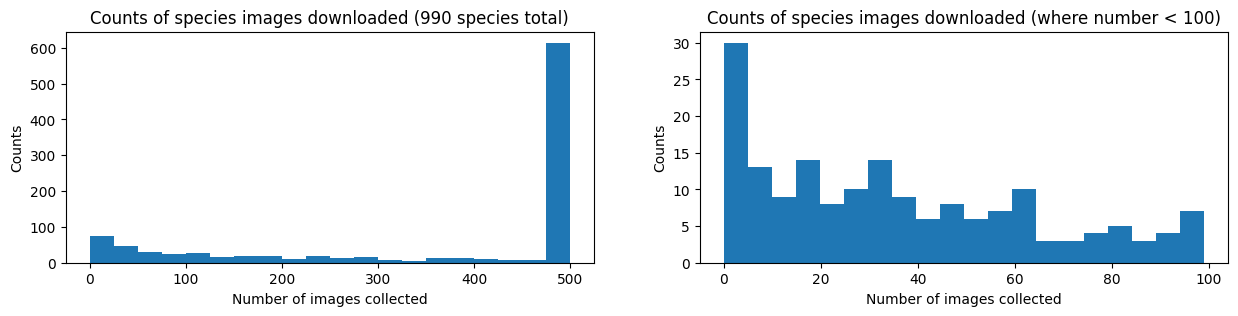

In [3]:
# create a histogram of the counts
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 3))

ax[0].hist(df['count'], bins=20)
ax[0].set_title('Counts of species images downloaded (990 species total)')
ax[0].set_xlabel('Number of images collected')
ax[0].set_ylabel('Counts')


ax[1].hist(df.loc[df['count'] < 100, 'count'], bins=20)
ax[1].set_title('Counts of species images downloaded (where number < 100)')
ax[1].set_xlabel('Number of images collected')
ax[1].set_ylabel('Counts')

plt.show()


df = pd.read_csv('/bask/projects/v/vjgo8416-amber/data/gbif-species-trainer-AMI-fork/gbif_images/try_wrapper')

In [4]:
df = pd.read_csv('/bask/projects/v/vjgo8416-amber/data/gbif-species-trainer-AMI-fork/gbif_images/try_wrapper/data_statistics.csv')
df.shape

FileNotFoundError: [Errno 2] No such file or directory: '/bask/projects/v/vjgo8416-amber/data/gbif-species-trainer-AMI-fork/gbif_images/try_wrapper/data_statistics.csv'

KeyError: 'image_count'

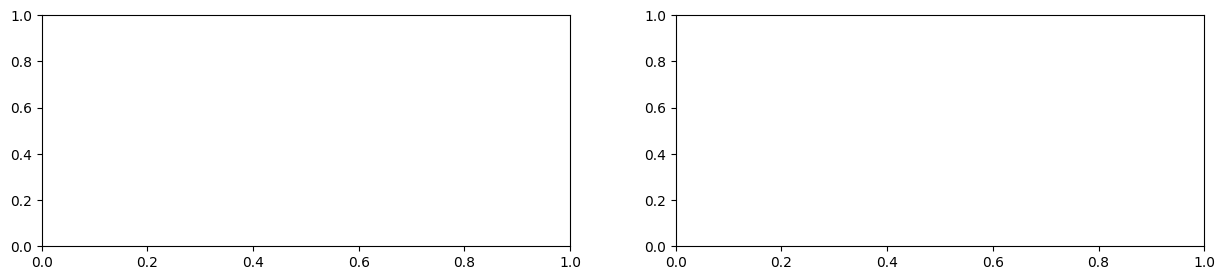

In [5]:
# create a histogram of the counts
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 3))

ax[0].hist(df['image_count'], bins=20)
ax[0].set_title('Counts of species images downloaded (' + str(df.shape[0]) + ' species total)')
ax[0].set_xlabel('Number of images collected')
ax[0].set_ylabel('Counts')


ax[1].hist(df.loc[df['image_count'] < 100, 'image_count'], bins=20)
ax[1].set_title('Counts of species images downloaded (where number < 100)')
ax[1].set_xlabel('Number of images collected')
ax[1].set_ylabel('Counts')

plt.show()

In [9]:
import pandas as pd
df = pd.read_csv('/bask/projects/v/vjgo8416-amber/projects/on_device_classifier/02_model_training/pytorch/myfile.csv', on_bad_lines='skip')

df.head()

,True_label,True_family,True_genus,True_label_index,Pytorch_prediction,Pytorch_family,Pytorch_genus,Pytorch_prediction_index,TFLite_prediction,TFLite_family,TFLite_genus,TFLite_prediction_index,Pytorch_top10,Pytorch_top3,Pytorch_top1,TFLite_top10,TFLite_top3,TFLite_top1,Unnamed: 18
0,Leucania loreyi,Noctuidae,Leucania,631,Lomographa temerata,Geometridae,Lomographa,63,Lomographa temerata,Geometridae,Lomographa,63,0,0,0,0,0,0,NaN
1,Lycia lapponaria,Geometridae,Lycia,274,Perizoma taeniata,Geometridae,Perizoma,315,Perizoma taeniata,Geometridae,Perizoma,315,1,0,0,1,0,0,NaN
2,Orgyia antiqua,Erebidae,Orgyia,981,Rheumaptera hastata,Geometridae,Rheumaptera,136,Rheumaptera hastata,Geometridae,Rheumaptera,136,0,0,0,1,0,0,NaN
3,Euchromia lethe,Erebidae,Euchromia,903,Euchromia lethe,Erebidae,Euchromia,903,Euchromia lethe,Erebidae,Euchromia,903,1,1,1,1,1,1,NaN
4,Pachycnemia hippocastanaria,Geometridae,Pachycnemia,213,Asthena albulata,Geometridae,Asthena,236,Asthena albulata,Geometridae,Asthena,236,0,0,0,0,0,0,NaN


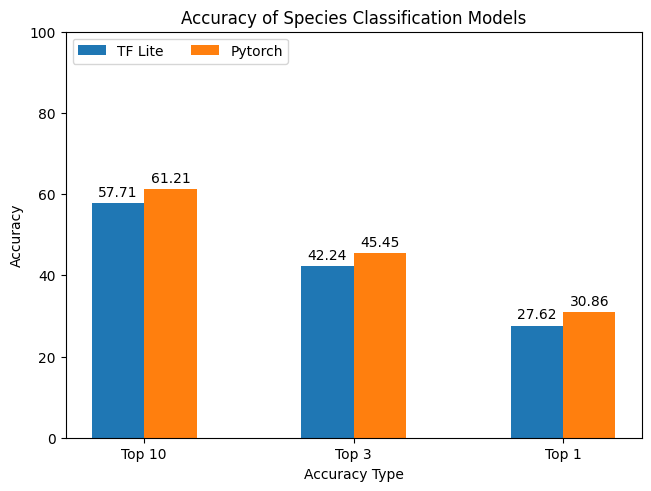

In [10]:
import matplotlib.pyplot as plt
import numpy as np


acc_type = ("Top 10", "Top 3", "Top 1")
accuracies = {
    'TF Lite': (sum(df['TFLite_top10'])/df.shape[0] * 100, sum(df['TFLite_top3'])/df.shape[0] * 100, sum(df['TFLite_top1'])/df.shape[0] * 100),
    'Pytorch': (sum(df['Pytorch_top10'])/df.shape[0] * 100, sum(df['Pytorch_top3'])/df.shape[0] * 100, sum(df['Pytorch_top1'])/df.shape[0] * 100),
}

x = np.arange(len(acc_type))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in accuracies.items():
    print_meas = [round(x, 2) for x in measurement]
    offset = width * multiplier
    rects = ax.bar(x + offset, print_meas, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Accuracy')
ax.set_xlabel('Accuracy Type')
ax.set_title('Accuracy of Species Classification Models')
ax.set_xticks([x + 0.125 for x in list(range(0, len(acc_type)))], acc_type)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)

plt.show()

In [11]:
def calc_acc(true_col, pred_col):
    temp = [1 if df[true_col][i] == df[pred_col][i] else 0 for i in range(df.shape[0])] 
    temp = sum(temp)/df.shape[0] * 100
    return(temp)

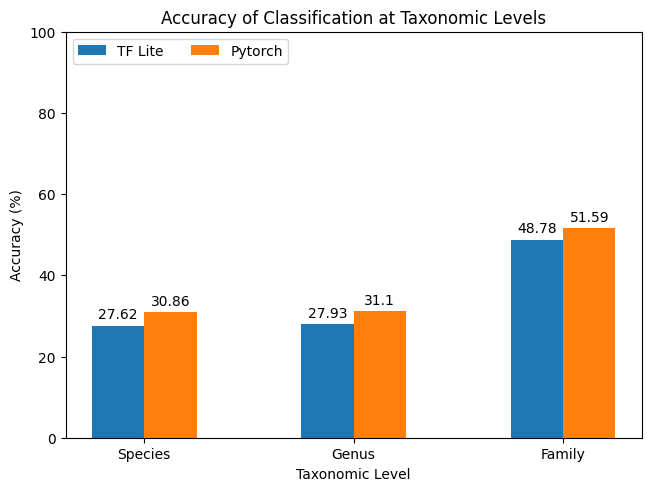

In [12]:
acc_type = ("Species", "Genus", "Family")

accuracies = {
    'TF Lite': (calc_acc('True_label', 'TFLite_prediction'), calc_acc('True_genus', 'TFLite_genus'), calc_acc('True_family', 'TFLite_family')),
    'Pytorch': (calc_acc('True_label', 'Pytorch_prediction'), calc_acc('True_genus', 'Pytorch_genus'), calc_acc('True_family', 'Pytorch_family')),
}

x = np.arange(len(acc_type))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in accuracies.items():
    print_meas = [round(x, 2) for x in measurement]
    offset = width * multiplier
    rects = ax.bar(x + offset, print_meas, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Taxonomic Level')
ax.set_title('Accuracy of Classification at Taxonomic Levels')
ax.set_xticks([x + 0.125 for x in list(range(0, len(acc_type)))], acc_type)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)

plt.show()

In [13]:
df.loc[df['True_label_index'] == 0, ]

,True_label,True_family,True_genus,True_label_index,Pytorch_prediction,Pytorch_family,Pytorch_genus,Pytorch_prediction_index,TFLite_prediction,TFLite_family,TFLite_genus,TFLite_prediction_index,Pytorch_top10,Pytorch_top3,Pytorch_top1,TFLite_top10,TFLite_top3,TFLite_top1,Unnamed: 18
23,Lomaspilis marginata,Geometridae,Lomaspilis,0,Xylena vetusta,Noctuidae,Xylena,517,Xylena vetusta,Noctuidae,Xylena,517,0,0,0,0,0,0,NaN
659,Lomaspilis marginata,Geometridae,Lomaspilis,0,Lithophane ornitopus,Noctuidae,Lithophane,916,Lithophane ornitopus,Noctuidae,Lithophane,916,0,0,0,0,0,0,NaN
822,Lomaspilis marginata,Geometridae,Lomaspilis,0,Euphyia unangulata,Geometridae,Euphyia,492,Euphyia unangulata,Geometridae,Euphyia,492,0,0,0,0,0,0,NaN
860,Lomaspilis marginata,Geometridae,Lomaspilis,0,Antichloris viridis,Erebidae,Antichloris,43,Antichloris viridis,Erebidae,Antichloris,43,1,0,0,1,0,0,NaN
2256,Lomaspilis marginata,Geometridae,Lomaspilis,0,Operophtera fagata,Geometridae,Operophtera,245,Operophtera fagata,Geometridae,Operophtera,245,0,0,0,0,0,0,NaN
2411,Lomaspilis marginata,Geometridae,Lomaspilis,0,Euphyia unangulata,Geometridae,Euphyia,492,Euphyia unangulata,Geometridae,Euphyia,492,0,0,0,0,0,0,NaN
4163,Lomaspilis marginata,Geometridae,Lomaspilis,0,Operophtera fagata,Geometridae,Operophtera,245,Euphyia unangulata,Geometridae,Euphyia,492,1,0,0,0,0,0,NaN
5402,Lomaspilis marginata,Geometridae,Lomaspilis,0,Euphyia unangulata,Geometridae,Euphyia,492,Euphyia unangulata,Geometridae,Euphyia,492,0,0,0,0,0,0,NaN


# Species Heatmap

In [14]:
df3 = pd.crosstab(df["TFLite_prediction"], df["True_label"], dropna=True, normalize="index")
df3 = df3.fillna(0)


# Force the df to be square
i = list(set(list(df["TFLite_prediction"]) + list(df["True_label"])))
df3 = df3.reindex(index=i, columns=i, fill_value=0)

df3.head()

True_label,Autographa jota,Rhyacia lucipeta,Larentia clavaria,Agrotis herzogi,Elaphria venustula,Hemistola chrysoprasaria,Sideridis reticulata,Pterostoma palpina,Eucarta virgo,Zanclognatha lunalis,...,Daphnis nerii,Diaphora mendica,Hepialus humuli,Eupithecia tenuiata,Orthosia cerasi,Sesia apiformis,Peribatodes umbraria,Hoplodrina ambigua,Cucullia asteris,Abrostola triplasia
TFLite_prediction,,,,,,,,,,,,,,,,,,,,,
Autographa jota,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rhyacia lucipeta,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Larentia clavaria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agrotis herzogi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Elaphria venustula,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
import operator

fam_dict = pd.Series(list(df.True_family) + list(df.True_family), index=list(df.True_label)+list(df.TFLite_prediction)).to_dict()
gen_dict = pd.Series(list(df.True_genus) + list(df.True_genus),index=list(df.True_label)+list(df.TFLite_prediction)).to_dict()

In [16]:
fam_col = sns.color_palette("husl", len(set(fam_dict.values())))
gen_col = sns.color_palette("husl", len(set(gen_dict.values())))

fam_col = dict(zip(list(set(fam_dict.values())), [tuple(int(c*255) for c in cs) for cs in fam_col]))
gen_col = dict(zip(list(set(gen_dict.values())), [tuple(int(c*255) for c in cs) for cs in gen_col]))

# #colors = [tuple(t / 255 for t in x) for x in rgb]

fam_col = [fam_col[fam_dict[x]] for x in list(df3.columns)]
gen_col = [gen_col[gen_dict[x]] for x in list(df3.columns)]

fam_col = [tuple(round(t / 255, 2) for t in x) for x in fam_col]
gen_col = [tuple(round(t / 255, 2) for t in x) for x in gen_col]

fam_col[0:10]

[(0.81, 0.56, 0.19),
 (0.21, 0.67, 0.64),
 (0.35, 0.62, 0.96),
 (0.81, 0.56, 0.19),
 (0.81, 0.56, 0.19),
 (0.81, 0.56, 0.19),
 (0.21, 0.67, 0.64),
 (0.84, 0.45, 0.96),
 (0.35, 0.62, 0.96),
 (0.96, 0.42, 0.71)]

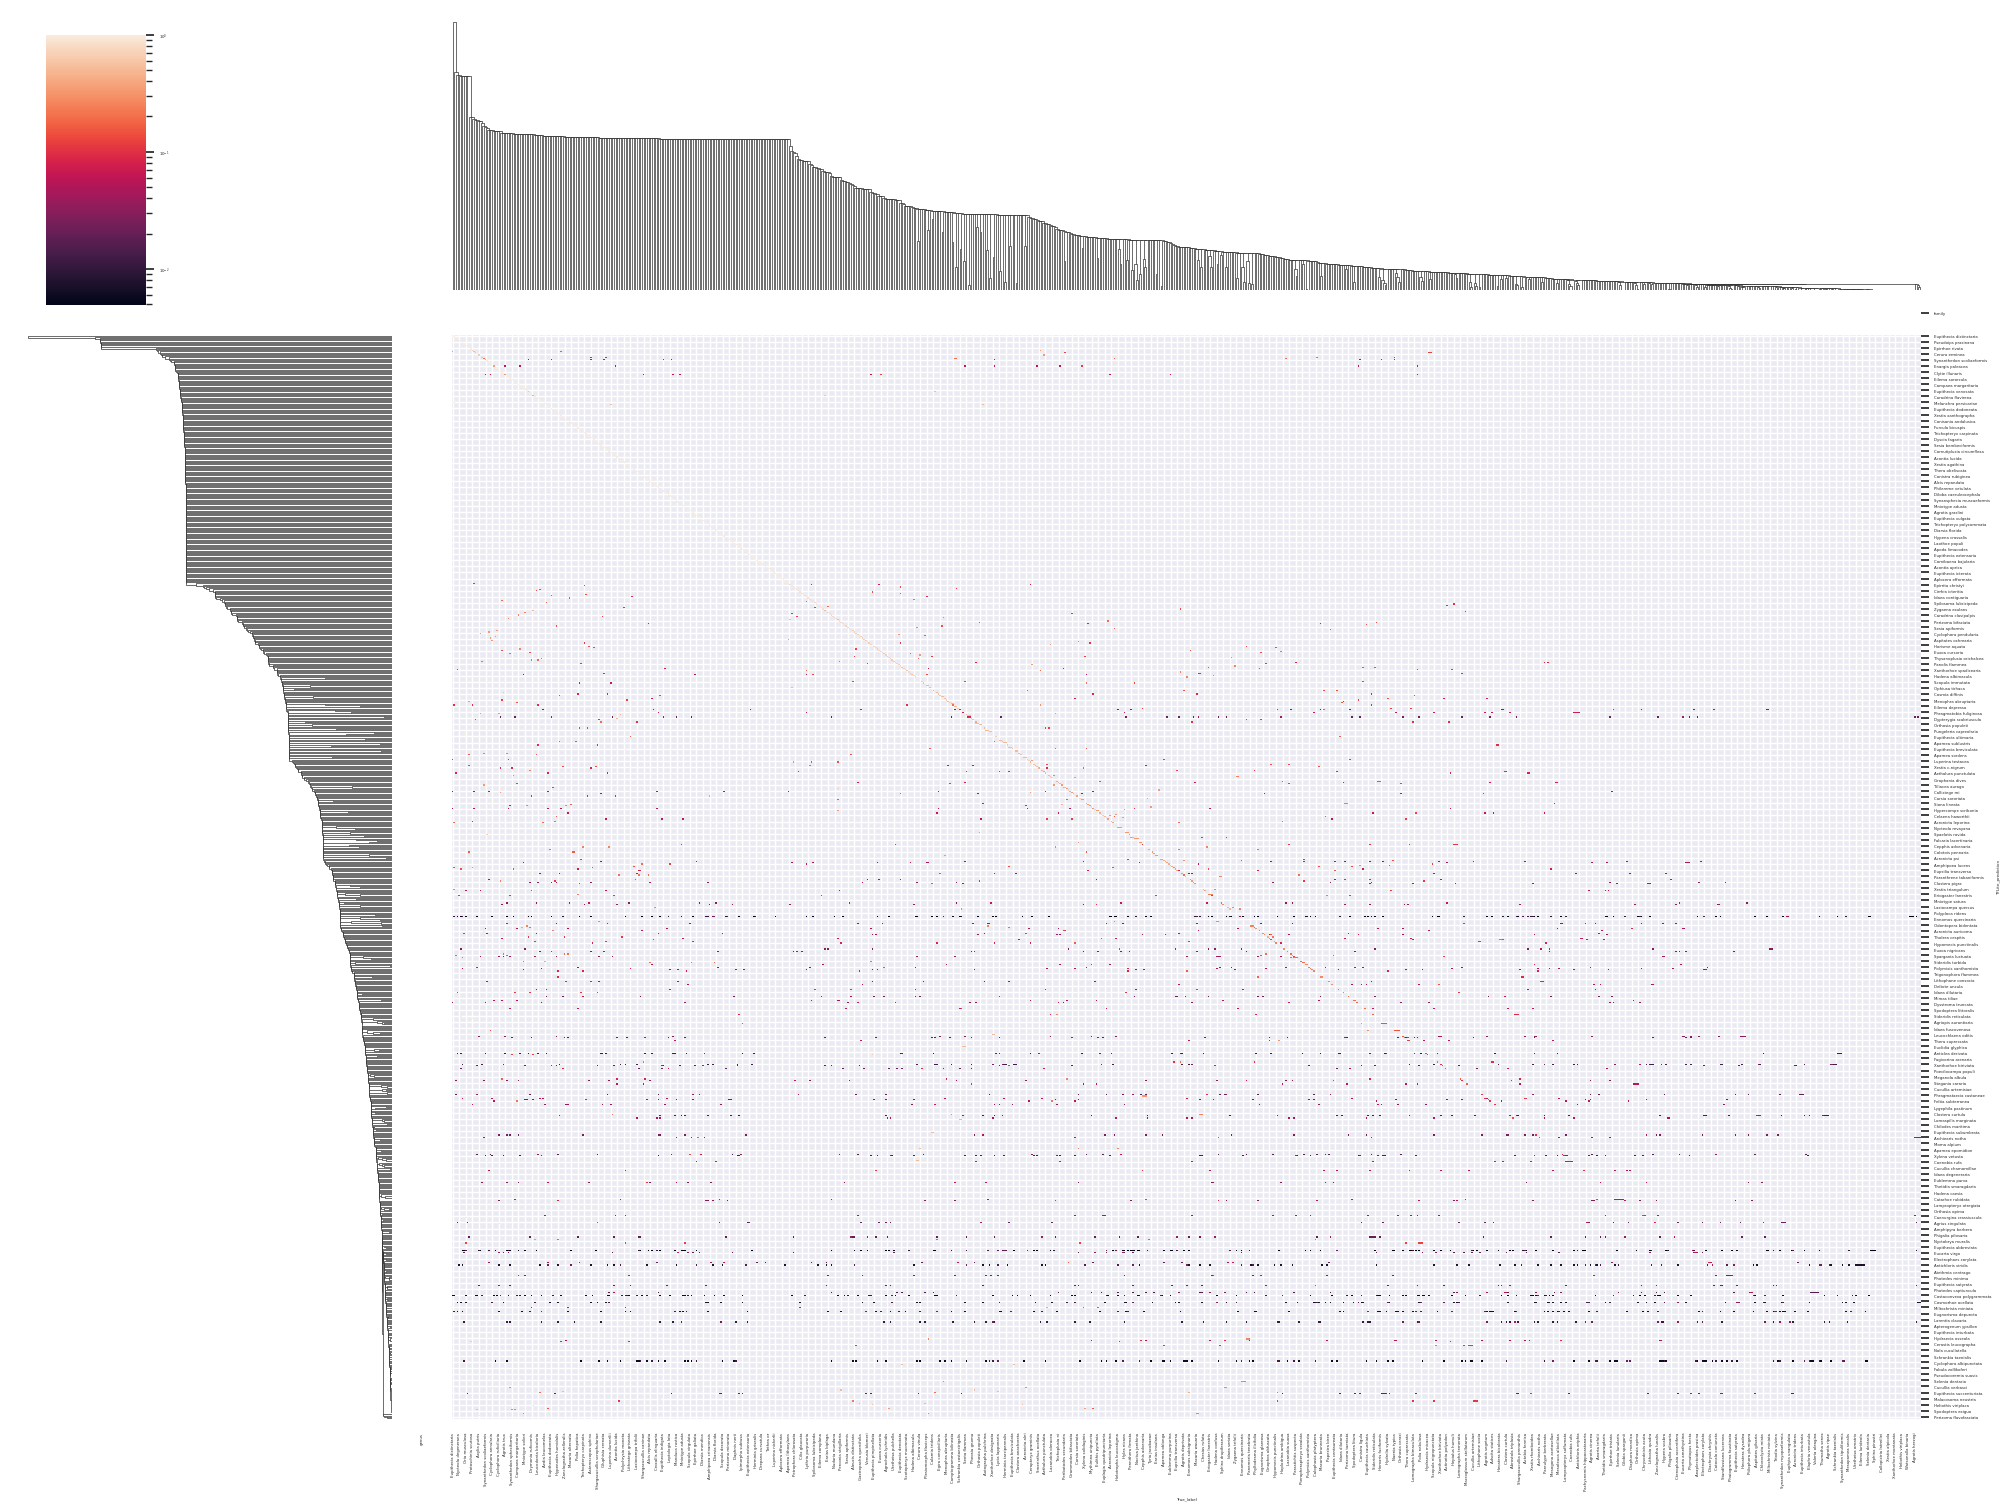

In [17]:
from scipy.cluster.hierarchy import linkage
import matplotlib

link = linkage(df3.transpose()) 

genus_colors = pd.DataFrame(data={'genus': gen_col }) 
family_colors = pd.DataFrame(data={'family': fam_col }) 

sns.set(font_scale=0.25)

sns.clustermap(df3, row_linkage=link, col_linkage=link, row_colors=genus_colors, col_colors=family_colors, 
               norm=matplotlib.colors.LogNorm(), figsize=(20,15))


plt.show()

# Genus heatmap

In [19]:
df4 = pd.crosstab(df["TFLite_genus"], df["True_genus"], dropna=True, normalize="index")
df4 = df4.fillna(0)


# Force the df to be square
i = list(set(list(df["TFLite_genus"]) + list(df["True_genus"])))
df4 = df4.reindex(index=i, columns=i, fill_value=0)

df4.head()

True_genus,Endromis,Arenostola,Tholera,Fagivorina,Celaena,Lampropteryx,Mamestra,Epirrhoe,Setina,Dicycla,...,Utetheisa,Minoa,Psaphida,Tyta,Ligdia,Diarsia,Chiasmia,Aplasta,Rhyacia,Craniophora
TFLite_genus,,,,,,,,,,,,,,,,,,,,,
Endromis,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arenostola,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tholera,0.0,0.0,0.211538,0.0,0.000000,0.0,0.0,0.057692,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fagivorina,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Celaena,0.0,0.0,0.000000,0.0,0.666667,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


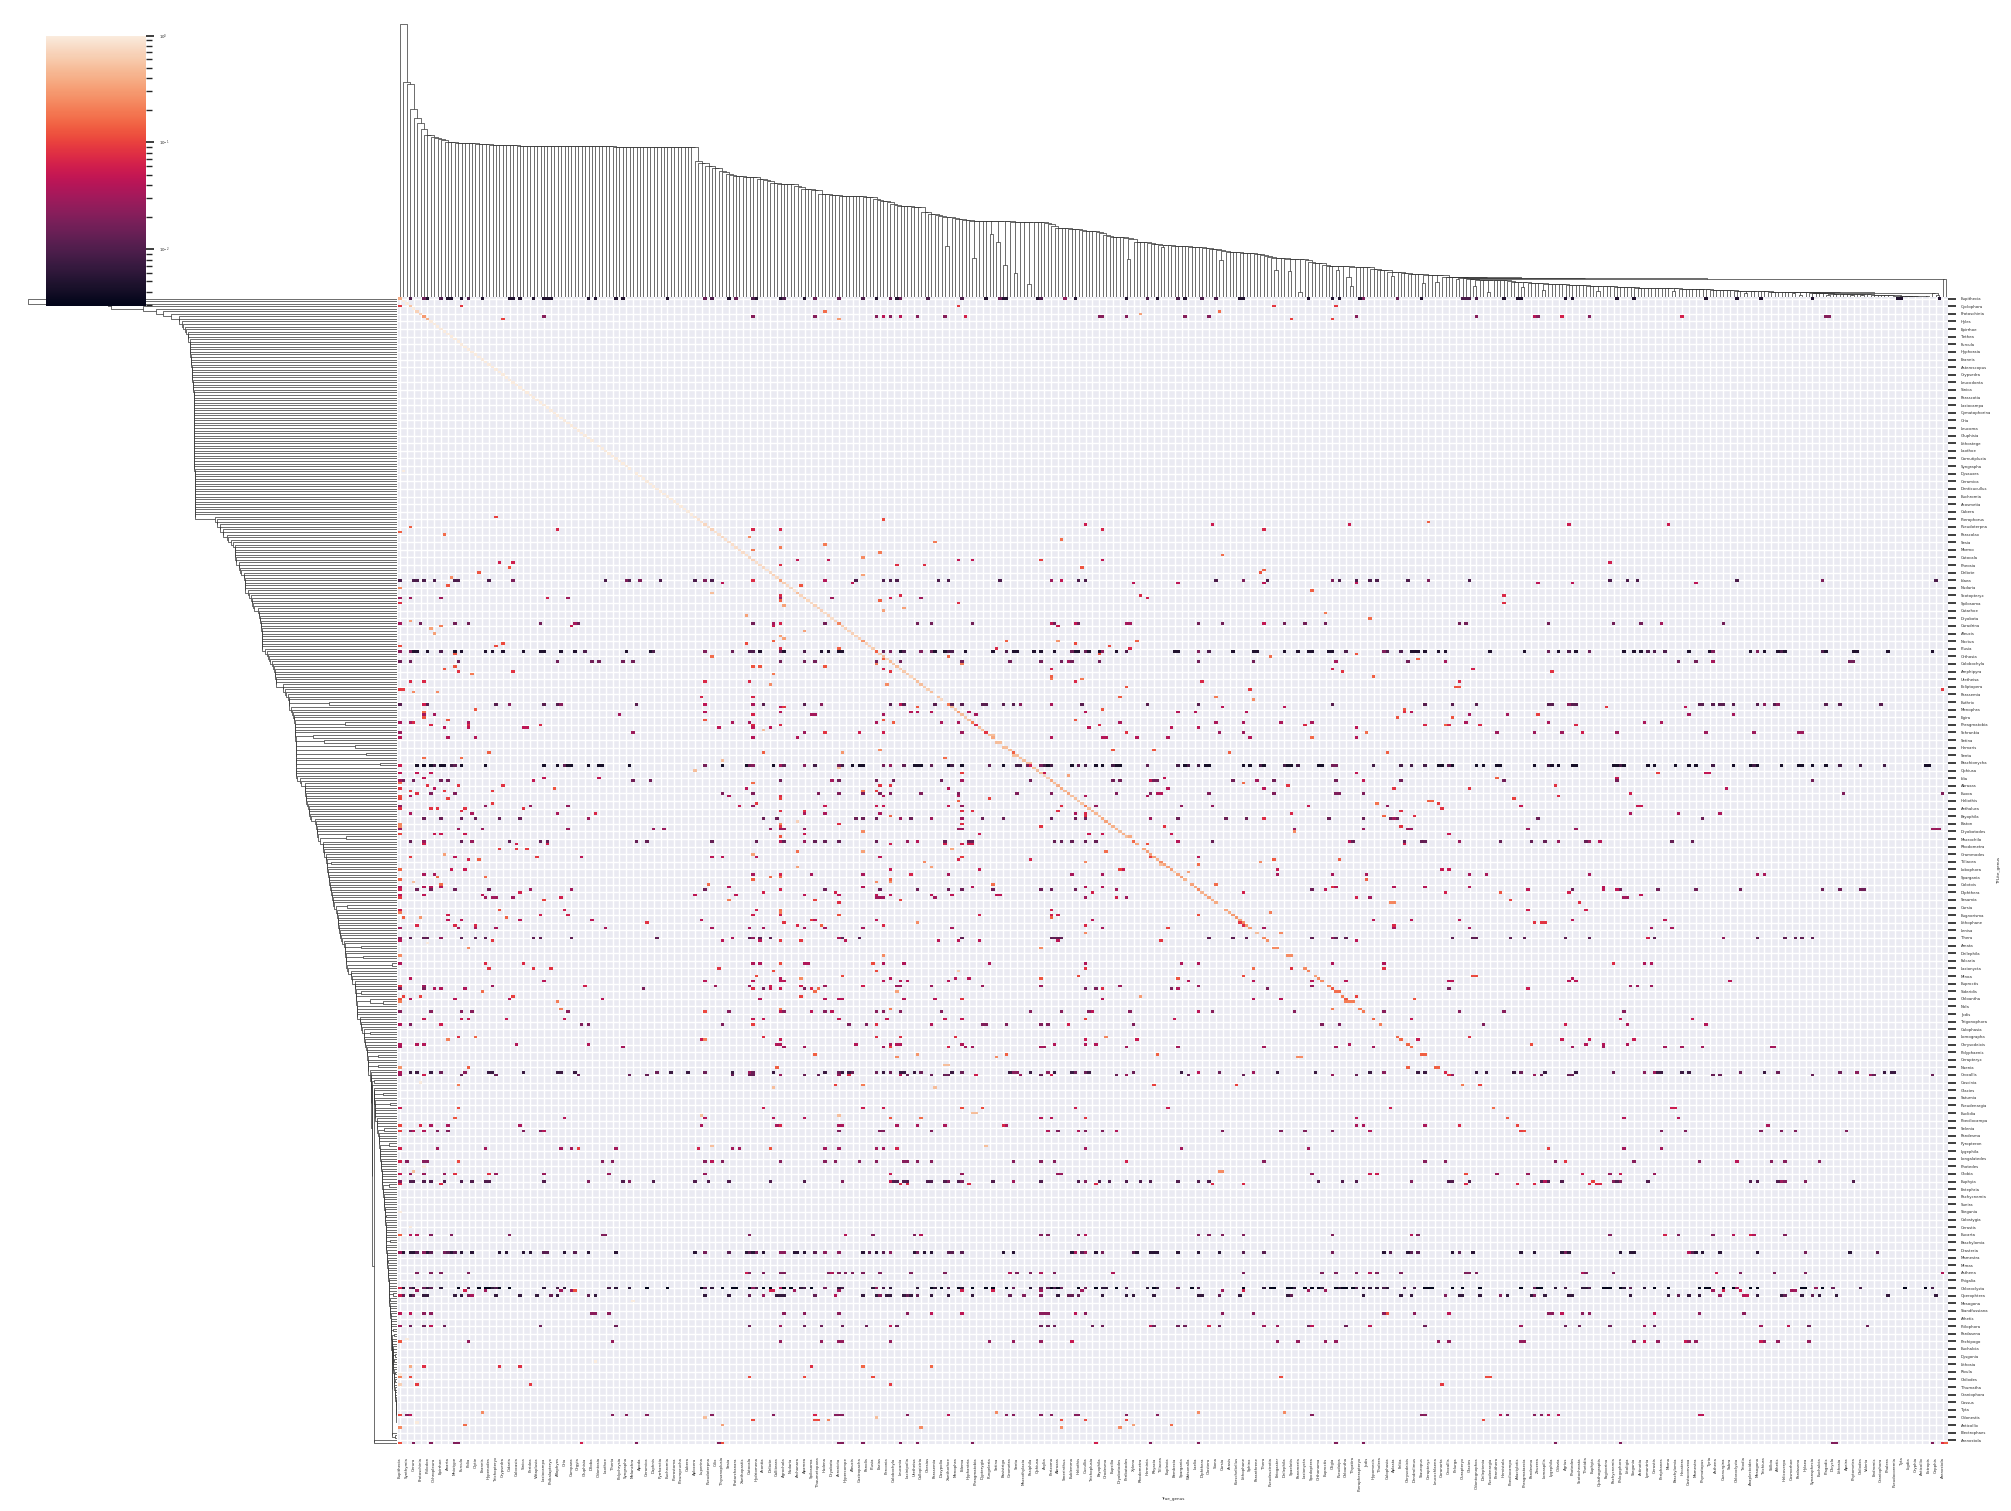

In [20]:
from scipy.cluster.hierarchy import linkage
import matplotlib

link = linkage(df4.transpose()) 

sns.set(font_scale=0.25)

sns.clustermap(df4, row_linkage=link, col_linkage=link, 
               norm=matplotlib.colors.LogNorm(), figsize=(20,15))


plt.show()

# Family Heatmap

In [26]:
df5.head()

True_family,Pterophoridae,Endromidae,Noctuidae,Notodontidae,Hepialidae,Sesiidae,Saturniidae,Drepanidae,Nolidae,Lasiocampidae,Limacodidae,Geometridae,Cossidae,Sphingidae,Zygaenidae,Erebidae
TFLite_family,,,,,,,,,,,,,,,,
Pterophoridae,0.888889,0.0,0.111111,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Endromidae,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Noctuidae,0.000000,0.0,0.615287,0.025268,0.001895,0.010739,0.0,0.005054,0.017056,0.009476,0.0,0.216045,0.001263,0.017688,0.005685,0.074542
Notodontidae,0.000000,0.0,0.277419,0.387097,0.006452,0.006452,0.0,0.000000,0.045161,0.012903,0.0,0.161290,0.000000,0.032258,0.006452,0.064516
Hepialidae,0.000000,0.0,0.428571,0.000000,0.285714,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.285714,0.000000,0.000000,0.000000,0.000000


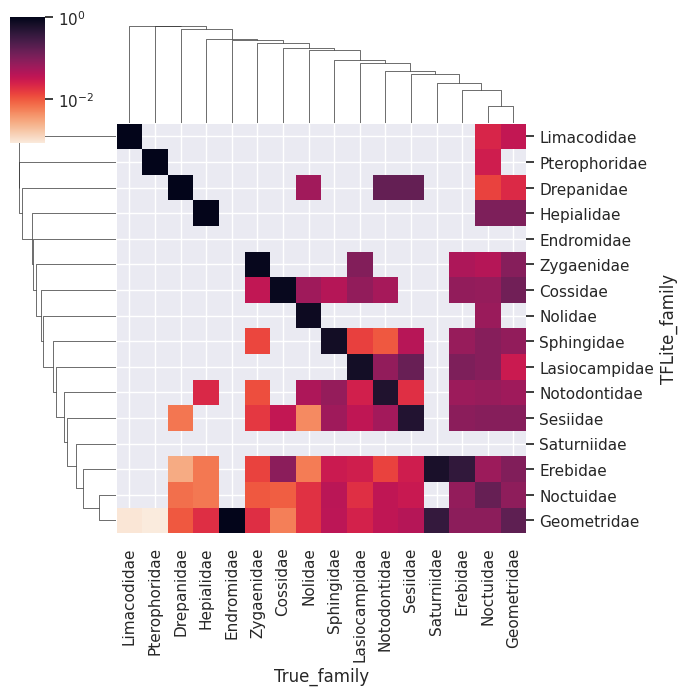

In [28]:
df5 = pd.crosstab(df["TFLite_family"], df["True_family"], dropna=True, normalize="index")
df5 = df5.fillna(0)
df5 = df5.div(df5.sum(axis=0), axis=1) # normalise to 1

# Force the df to be square
i = list(set(list(df["TFLite_family"]) + list(df["True_family"])))
df5 = df5.reindex(index=i, columns=i, fill_value=0)

link = linkage(df5.transpose()) 

sns.set(font_scale=1)

sns.clustermap(df5, row_linkage=link, col_linkage=link, cmap=sns.cm.rocket_r,
               norm=matplotlib.colors.LogNorm(), figsize=(7,7))


plt.show()

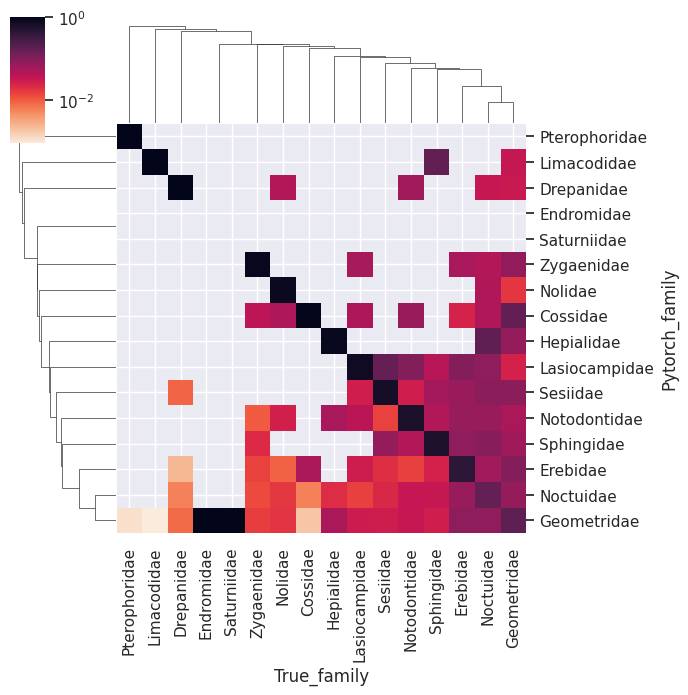

In [29]:
df5 = pd.crosstab(df["Pytorch_family"], df["True_family"], dropna=True, normalize="index")
df5 = df5.fillna(0)
df5 = df5.div(df5.sum(axis=0), axis=1) # normalise to 1

# Force the df to be square
i = list(set(list(df["Pytorch_family"]) + list(df["True_family"])))
df5 = df5.reindex(index=i, columns=i, fill_value=0)

link = linkage(df5.transpose()) 

sns.set(font_scale=1)

sns.clustermap(df5, row_linkage=link, col_linkage=link, cmap=sns.cm.rocket_r,
               norm=matplotlib.colors.LogNorm(), figsize=(7,7))


plt.show()